Técnica estadística utilizada para explorar las relaciones entre dos conjuntos de variables. CCA se aplica cuando tenés dos conjuntos de variables, uno de variables respuesta (o dependientes) y otro de variables predictoras (o independientes).

### Componentes Clave

El objetivo principal de CCA es encontrar combinaciones lineales de las variables en cada conjunto de modo que la correlación entre estas combinaciones sea máxima.

Se utiliza como complemento a los modelos de regresión u otras técnicas predictivas. Mientras que los modelos de regresión se centran en predecir una variable de respuesta a partir de un conjunto de predictores, CCA busca entender cómo se relacionan dos conjuntos de variables de manera global.

CCA proporciona coeficientes (llamados coeficientes de correlación canónica) que indican la fuerza y dirección de las relaciones entre los dos conjuntos de variables. Estos coeficientes ayudan a entender qué variables de un conjunto están asociadas con qué variables del otro conjunto.

### Armado del dataset.

In [1]:
# Carga de librerías.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset con las variables respuesta en cada columna propia. 

Ejemplo:

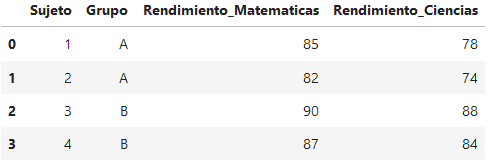

Las variables respuesta son Rendimiento_Matematicas y Rendimiento_Ciencias.

In [2]:
# Carga del dataset.

%run "Base 5 - 1. Dataset para modelos.ipynb"

En este programa se hace esto: pasar las variables respuesta a un formato largo.


#### Acomodar dataset (por ahora es manual). 
Si tenemos dos variables respuesta, que son, por ejemplo, V1 y V2, se crea una columna nueva que se llama "Variables", y en este columna va a indicar si es V1 o V2. En otra columna, "Valor", va a ir el valor correspondiente de cada variable.


Algo así:

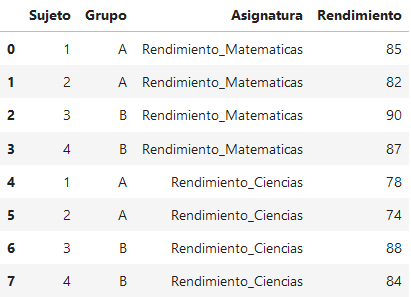

En este ejemplo, las variables respuesta son Rendimiento_Matemática y Rendimiento_Ciencias. Se pone en la columna "Asignatura" a cuál variable corresponde, y en "Rendimiento" se pone el valor original.

### Armamos el modelo.

Definimos los efectos aleatorios, que son los que capturan la variabilidad específica de cada grupo o nivel de una variable categórica. En el caso del ejemplo, Sujeto es el grupo para los efectos aleatorios, lo que significa que esperamos que haya variabilidad en el rendimiento que sea específica de cada sujeto.

Los efectos fijos son los efectos que estamos interesados en estimar, como las diferencias entre grupos o asignaturas.

#### Definición de Variables Respuesta y Variables Explicatorias.

In [3]:
# Está en el programa anterior: 1. Dataset para modelos.ipynb
# Si lo querés editar, editalo ahí.

#### Chequeos.

1) Valores no nulos.

In [4]:
# Valores nulos en variables explicatorias.
Nulos = df_Largo[Variables_Explicatorias].isnull().sum()

# Filtrar las columnas que tienen valores nulos.
Columnas_Con_Nulos = Nulos[Nulos > 0].index

# Ajustar las opciones de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

if len(Columnas_Con_Nulos) > 0:
    print("Valores nulos por columna:")
    print(Nulos[Columnas_Con_Nulos])

2) Valores no numéricos.

In [5]:
# Valores no numéricos en cada columna.
for i in Variables_Explicatorias:
    if not pd.api.types.is_numeric_dtype(df_Largo[i]):
        print(f"La columna {i} no es numérica.")

3. Por las dudas, cambiar a categóricas.

In [6]:
# Convertir todas las variables explicatorias a numéricas.
for i in Variables_Explicatorias:
    df_Largo[i] = pd.to_numeric(df_Largo[i], errors='coerce')

4. Chequear que todas las columnas tengan la misma cantidad de filas.

In [7]:
for i in df_Largo.columns:
    Numero_Filas_Columna = df_Largo[i].shape[0]
    if Numero_Filas_Columna != df_Largo.shape[0]:
        print(f"La columna {i} tiene {Numero_Filas_Columna} filas, diferente de {df_Largo.shape[0]} filas del DataFrame.")

5. Eliminación de columnas del df que pesan poco. Esto se hace a mano.

6. Abajo, se redefinen las VR y VEs.

In [8]:
# Eliminamos algunas columnas del df.

Columnas_Eliminadas = [
    "e_social_Alto",
    "e_social_Bajo",
    "niv_educativo_Posgrado",
    "niv_educativo_Primario",
    "niv_educativo_Terciario",
    "inmueble_res_Cedido",
    "inmueble_res_Propio",
    "voto_2019_DelCaño",
    "candidato_PASO_2023_Bregman",
    "candidato_PASO_2023_Bullrich",
    "candidato_PASO_2023_Grabois",
    "candidato_PASO_2023_Larreta",
    "candidato_PASO_2023_Milei",
    "candidato_PASO_2023_Reservado",
    "candidato_PASO_2023_Schiaretti",
    "edad",
    "milei_ip_conpro",
    "milei_ip_rt",
    "e_social_MedioAlto",
    "e_social_MedioBajo",
    "voto_2019_Fernandez",
    "voto_2019_Macri",
    'indice_positividad',
    'indice_progresismo_tiempo',
    'indice_conservadurismo_tiempo',
     'massa_ip_izqder',
     'massa_ip_conpro',
     'massa_ip_rt',
     'milei_ip_izqder',
     'genero_Otro',
     'provincia_BsAs',
     'provincia_CABA',
     'provincia_Chaco',
     'provincia_Chubut',
     'provincia_Cordoba',
     'provincia_EntreRios',
     'provincia_Mendoza',
     'provincia_Neuquen',
     'provincia_Otro',
     'provincia_RioNegro',
     'provincia_SanLuis',
     'provincia_SantaFe',
     'provincia_Tucuman',
     'e_social_Medio',
     'niv_educativo_Secundario',
     'niv_educativo_Universitario',
     'f_ingreso_Beca',
     'f_ingreso_EmpresaPropia',
     'f_ingreso_Familia',
     'f_ingreso_Otro',
     'f_ingreso_Renta',
     'f_ingreso_Trabajo',
     'inmueble_res_Alquilo',
     'inmueble_res_Otro',
     'inmueble_res_Prestado',
     'voto_2019_Blanco',
     'voto_2019_Espert',
     'voto_2019_GomezCenturion',
     'voto_2019_Lavagna',
     'voto_2019_NoVoto',
     'voto_2019_Reservado',
     'voto_PASO_2023_No',
     'voto_PASO_2023_Otro',
     'voto_PASO_2023_Si',
     'candidato_PASO_2023_Blanco',
     'candidato_PASO_2023_Inaplicable',
     'candidato_PASO_2023_Massa',
     'candidato_PASO_2023_Moreno',
     'candidato_PASO_2023_Otro',
     'votara_2023_Ignora',
     'votara_2023_No',
     'votara_2023_Si',
     'afiliacion_pol_No',
     'afiliacion_pol_Si',
     'indice_progresismo',
      'indice_conservadurismo',
      'genero_Femenino',
      'genero_Masculino',
      'autopercep_conpro',
'autopercep_izqder',
'autopercep_perantiper',
'cercania_Massa',
'cercania_Milei',	
'cercania_Bullrich',
 'cercania_Bregman',
 'cercania_Schiaretti',
 'bullrich_ip_izqder',
 'bullrich_ip_conpro',
 'bullrich_ip_rt',
 'schiaretti_ip_izqder',
 'schiaretti_ip_conpro',
 'schiaretti_ip_rt',
 'bregman_ip_izqder',
 'bregman_ip_conpro',
 'bregman_ip_rt',
#                      'tipo_candidato_con_Derecha',	
#                       'tipo_candidato_con_Izquierda',	
#                       'tipo_candidato_pro_Derecha',	
#                       'tipo_candidato_pro_Izquierda',	
'cambio_tiempo_con',
'cambio_tiempo_pro'
]

# Eliminar las columnas.
df_Largo = df_Largo.drop(columns=Columnas_Eliminadas)

In [9]:
# Grupos de variables.
Variables_Respuesta = ['cambio_op_con',
                       'cambio_op_pro'
                      ]

Variables_Explicatorias = [i for i in df_Largo.columns if i not in ['id', 'const'] + Variables_Respuesta + Cambio_Opinion]

Variables_Explicatorias

['tipo_candidato_con_Derecha',
 'tipo_candidato_con_Izquierda',
 'tipo_candidato_pro_Derecha',
 'tipo_candidato_pro_Izquierda']

#### Modelo.

In [10]:
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Inicializar el modelo de CCA.
Modelo_CCA = CCA(n_components=2)  # Se puede ajustar el número de componentes según las necesidades

# Convertir las listas con los nombres de las columnas en dfs para seleccionar las columnas correspondientes.
df_VE = df_Largo[Variables_Explicatorias]
df_VR = df_Largo[Variables_Respuesta]

scaler = StandardScaler()

# Transformar dfs.
df_VE = scaler.fit_transform(df_VE)
df_VR = scaler.fit_transform(df_VR) 

# Ajustar modelo.
Modelo_CCA.fit(df_VE, df_VR)

# Obtener las componentes canónicas.
VE_CC, VR_CC = Modelo_CCA.transform(df_VE, df_VR)

<BarContainer object of 2 artists>

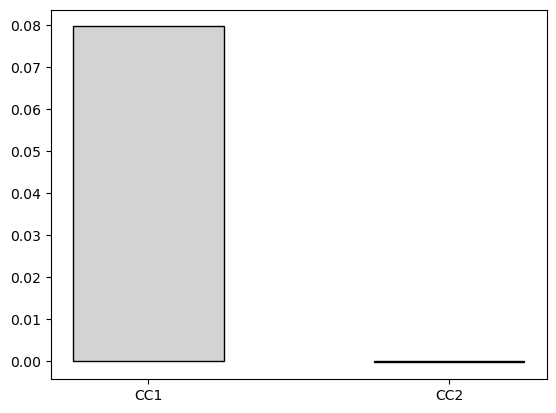

In [12]:
# En caso de 2 componentes. 

# Ver correlación de los dos pares canónicos.
Correlación_Pares_Canónicos = [np.corrcoef(VE_CC[:, i], VR_CC[:, i])[1][0] for i in range(2)]
plt.bar(['CC1', 'CC2'], Correlación_Pares_Canónicos, color='lightgrey', width = 0.5, edgecolor='k')

In [13]:
# En caso de 1 componente.

# Ver la correlación del componente canónico.
# Correlacion_Canonica = np.corrcoef(VE_CC[:, 0], VR_CC[:, 0])[1][0]

# Visualizar la correlación
# plt.bar(['CC1'], [Correlacion_Canonica], color='lightgrey', width=0.5, edgecolor='k')
# plt.title('Correlación entre componentes canónicos')
# plt.ylabel('Correlación')
# plt.show()

Let’s see now which variables from both datasets influence their canonical variates the most. We do that by analyzing the loadings associated with each of our canonical variates.

In [14]:
Variables_Pesadas = []
Componente1 = []
Componente2 = []

# Iterar sobre las cargas de las variables explicativas
for i in range(0, len(Modelo_CCA.x_loadings_)):
    # Obtener las cargas de la variable explicativa i
    loadings_i = Modelo_CCA.x_loadings_[i]
    
    # Verificar si alguna de las cargas absolutas es mayor que 0.1
    if np.any(np.abs(loadings_i) > 0.00001):
        # Imprimir el nombre de la variable explicativa y su carga correspondiente
        print(f"Variable explicativa: {Variables_Explicatorias[i]}")
        print(f"Carga: {loadings_i}")

Variable explicativa: tipo_candidato_con_Derecha
Carga: [-0.5         0.50010532]
Variable explicativa: tipo_candidato_con_Izquierda
Carga: [ 0.5        -0.50010532]
Variable explicativa: tipo_candidato_pro_Derecha
Carga: [-0.5         0.50010532]
Variable explicativa: tipo_candidato_pro_Izquierda
Carga: [ 0.5        -0.50010532]


## p-valores.

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Obtener las componentes canónicas
correlaciones = {}
p_valores = {}

# Calcular correlaciones entre cada VE y cada VR
for i, var_exp in enumerate(Variables_Explicatorias):
    for j, var_resp in enumerate(Variables_Respuesta):
        corr, p_val = pearsonr(df_VE[:, i], df_VR[:, j])
        correlaciones[(var_exp, var_resp)] = corr
        p_valores[(var_exp, var_resp)] = p_val

# Convertir a DataFrames para una mejor visualización
df_correlaciones = pd.DataFrame(correlaciones, index=['Correlación'])
df_p_valores = pd.DataFrame(p_valores, index=['p-valor'])

print("Correlaciones:")
print(df_correlaciones)

print("\nP-valores:")
print(df_p_valores)

Correlaciones:
            tipo_candidato_con_Derecha                \
                         cambio_op_con cambio_op_pro   
Correlación                   0.058593     -0.075218   

            tipo_candidato_con_Izquierda                \
                           cambio_op_con cambio_op_pro   
Correlación                    -0.058593      0.075218   

            tipo_candidato_pro_Derecha                \
                         cambio_op_con cambio_op_pro   
Correlación                   0.058593     -0.075218   

            tipo_candidato_pro_Izquierda                
                           cambio_op_con cambio_op_pro  
Correlación                    -0.058593      0.075218  

P-valores:
        tipo_candidato_con_Derecha               tipo_candidato_con_Izquierda  \
                     cambio_op_con cambio_op_pro                cambio_op_con   
p-valor                   0.000012  1.984252e-08                     0.000012   

                      tipo_candidato_pro_Dere